In [1]:
import pandas as pd
file_path = 'Mall_Customers.csv'
df = pd.read_csv(file_path)
# Display first few rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


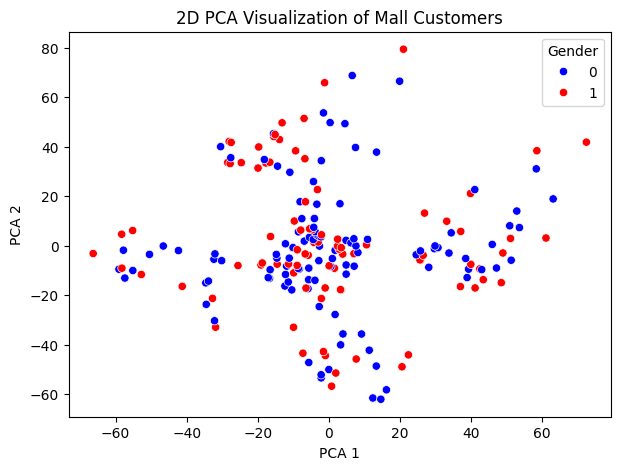

In [5]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Encode 'Gender' to numeric
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# PCA for 2D visualization (optional)
from sklearn.decomposition import PCA
X = df.drop(['CustomerID'], axis=1)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Gender'], palette=['blue','red'], legend='full')
plt.title('2D PCA Visualization of Mall Customers')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.savefig('pca_visualization.png')

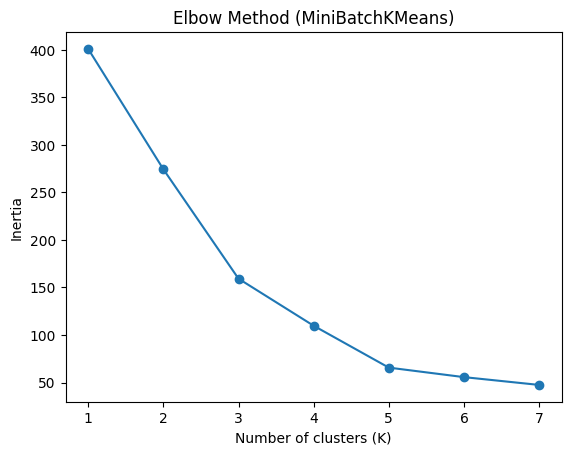

In [4]:
from sklearn.cluster import MiniBatchKMeans

# Use MiniBatchKMeans for faster computation
inertia = []
K_range = range(1, 8)
for k in K_range:
    mbkmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=50, max_iter=100, n_init=5)
    mbkmeans.fit(X_scaled)
    inertia.append(mbkmeans.inertia_)

# Plot Elbow Method
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method (MiniBatchKMeans)")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.show()


(np.float64(0.3574050351346702),
 [221136.4418859649,
  158794.2215016297,
  104414.67534220174,
  97260.4789301898,
  68324.82243305087,
  51496.86065374506,
  44687.23553400544,
  42129.07384501383,
  38425.97965415944])

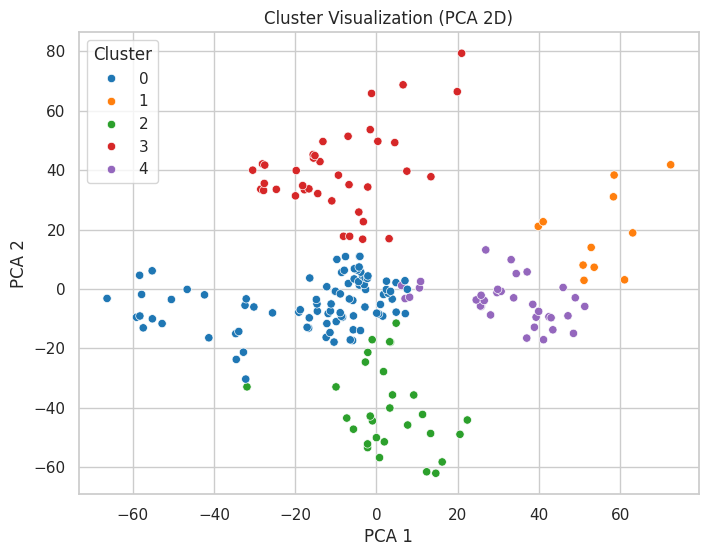

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Use features for clustering (excluding 'CustomerID')
X = df.drop('CustomerID', axis=1)

# Use the Elbow Method
wcss = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Find optimal clusters using wcss - will plot next
# Fit KMeans for optimal K after Elbow (let's assume K=5 for now, will plot elbow)
k_optimal = 5
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_final.fit(X)
df['Cluster'] = kmeans_final.labels_

# PCA for cluster visualization
df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

# Cluster scatter plot (color by cluster label)
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='tab10', data=df, legend='full')
plt.title('Cluster Visualization (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.savefig('cluster_pca.png')

# Silhouette Score
y_kmeans = kmeans_final.labels_
sil_score = silhouette_score(X, y_kmeans)
sil_score, wcss